# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ='../../../Data_preprocessing/Prediction PFS/Clinical_data_categorized_PFS.csv' 
data = pd.read_csv(path)
data.head()

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,MSKCC_NA,MSKCC_POOR,IMDC_FAVORABLE,IMDC_INTERMEDIATE,IMDC_NOT_REPORTED,IMDC_POOR,ImmunoPhenotype_Desert,ImmunoPhenotype_Excluded,ImmunoPhenotype_Infiltrated,ImmunoPhenotype_NA
0,0,NaN,73,0.0,0.0,2.0,808,0.0,1.545205,-1.0,...,0,0,0,0,1,0,0,0,1,0
1,1,NaN,55,0.0,0.0,2.0,1826,0.0,3.419178,-1.0,...,0,0,0,0,1,0,1,0,0,0
2,2,NaN,51,0.0,0.0,1.0,1541,0.0,1.413699,-1.0,...,0,0,0,0,1,0,0,0,1,0
3,3,NaN,70,0.0,0.0,3.0,-1,0.0,0.394521,-1.0,...,0,1,0,0,1,0,0,0,0,1
4,4,NaN,59,0.0,0.0,3.0,376,0.0,10.158904,-1.0,...,0,1,0,0,1,0,0,0,1,0


In [3]:
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

data = data.drop('PFS', axis=1) # As we won't need this column any more, I deleted it.

X = data.iloc[:,2:26] 
# I selected all the columns by removing the Unnamed column (row id) and the Target column.
print(X)
print('Numero de pacientes: ',len(Y))

     Age  Sarc  Rhab  Number_of_Prior_Therapies  \
0     73   0.0   0.0                        2.0   
1     55   0.0   0.0                        2.0   
2     51   0.0   0.0                        1.0   
3     70   0.0   0.0                        3.0   
4     59   0.0   0.0                        3.0   
..   ...   ...   ...                        ...   
285   54   0.0   0.0                        3.0   
286   56   0.0   0.0                        2.0   
287   65   0.0   0.0                        2.0   
288   48   0.0   0.0                        1.0   
289   76   0.0   0.0                        2.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
0                                                  808             
1                                                 1826             
2                                                 1541             
3                                                   -1             
4                                              

### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125)


print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_test))

Training set size: 232
Target column size of the training set: 232
Test set size: 58
Target column size of the test set: 58


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5],
            'solver': ['liblinear'], 
            'max_iter':[25,50,100,200,500,1000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation. 
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5],
                         'max_iter': [25, 50, 100, 200, 500, 1000],
                         'random_state': [125], 'solver': ['liblinear']})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=2, max_iter=25, random_state=125, solver='liblinear')

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5740055504162812


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.6293103448275862
Final accuracy on the testing dataset: 0.7241379310344828


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[ 45  60]
 [ 26 101]]
Input data:  [1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 0]
Prediction:        [1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0

In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.63      0.43      0.51       105
           1       0.63      0.80      0.70       127

    accuracy                           0.63       232
   macro avg       0.63      0.61      0.61       232
weighted avg       0.63      0.63      0.62       232



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[15 10]
 [ 6 27]]
Input data:  [1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0]
Prediction:        [1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        25
           1       0.73      0.82      0.77        33

    accuracy                           0.72        58
   macro avg       0.72      0.71      0.71        58
weighted avg       0.72      0.72      0.72        58



### 7. Results visualizaton

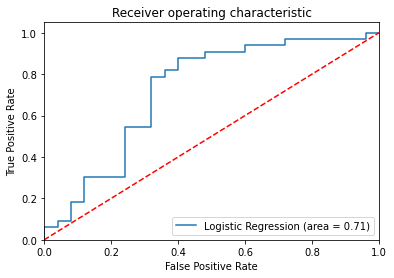

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Everolimus testing

In [16]:
path ='../../../Data_preprocessing/Testing with everolimus/Clinical_data_categorized_everolimus.csv'
data = pd.read_csv(path)

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data=data.drop(['Unnamed: 0', 'PFS', 'RNA_ID'], axis=1)

In [17]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.6309523809523809


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))


print(classification_report(Y, yhatTest))

----------------Confusion Matrix (Test)------------------
[[21 44]
 [18 85]]
Input data:  [1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0]
Prediction:        [1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1]
              precision    recall  f1-score   support

           0       0.54      0.32      0.40        65
           1       0.66      0.83      0.73       103

    accuracy                           0.63